In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/WidhyaOrg/datasets/master/covid19.csv")
df

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,1,30/01/20,Kerala,1,0,0,0
1,2,31/01/20,Kerala,1,0,0,0
2,3,01/02/20,Kerala,2,0,0,0
3,4,02/02/20,Kerala,3,0,0,0
4,5,03/02/20,Kerala,3,0,0,0
...,...,...,...,...,...,...,...
265,266,21/03/20,Jammu and Kashmir,4,0,0,0
266,267,21/03/20,Ladakh,13,0,0,0
267,268,21/03/20,Uttar Pradesh,23,1,9,0
268,269,21/03/20,Uttarakhand,3,0,0,0


In [3]:
#sorting the data by DATE 
sort_df=df.groupby('Date', sort = False).sum()
sort_df.head()

,Sno,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
Date,,,,,
30/01/20,1,1,0,0,0
31/01/20,2,1,0,0,0
01/02/20,3,2,0,0,0
02/02/20,4,3,0,0,0
03/02/20,5,3,0,0,0


In [4]:
#droping the coloumn Sno
sort_df = sort_df.drop('Sno', axis =1)
sort_df.head()

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
Date,,,,
30/01/20,1,0,0,0
31/01/20,1,0,0,0
01/02/20,2,0,0,0
02/02/20,3,0,0,0
03/02/20,3,0,0,0


In [5]:
#creating new coloumn 'Total cases' and using sum function 
sort_df['Total_cases'] = sort_df.sum(axis =1).astype('int')
sort_df

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Total_cases
Date,,,,,
30/01/20,1,0,0,0,1
31/01/20,1,0,0,0,1
01/02/20,2,0,0,0,2
02/02/20,3,0,0,0,3
03/02/20,3,0,0,0,3
04/02/20,3,0,0,0,3
05/02/20,3,0,0,0,3
06/02/20,3,0,0,0,3
07/02/20,3,0,0,0,3


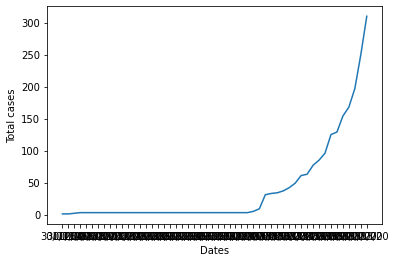

In [6]:
#visualizing the data using matplotlib
plt.plot(sort_df['Total_cases'])
plt.xlabel('Dates')
plt.ylabel('Total cases')
plt.show()

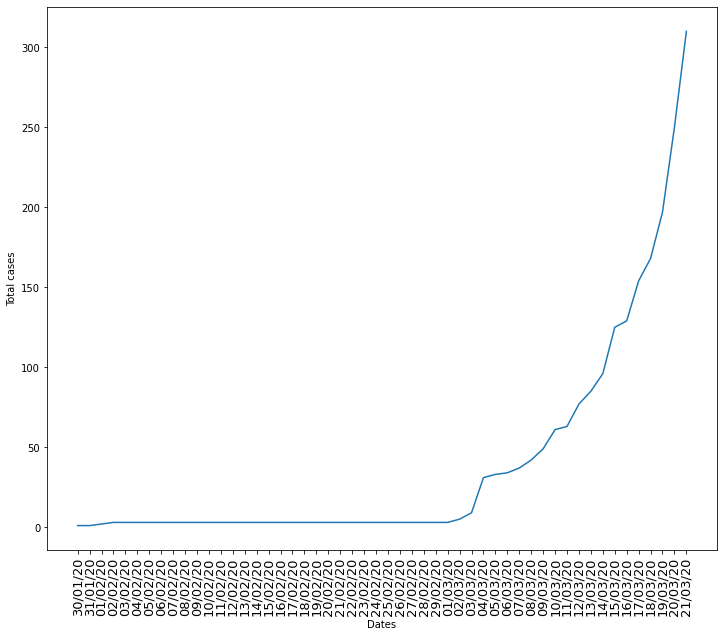

In [12]:
plt.figure(figsize = (12,10))
plt.plot(sort_df['Total_cases'])
plt.xlabel('Dates')
plt.ylabel('Total cases')
plt.xticks(rotation = 90, fontsize = 13)
plt.show()

In [8]:
sort_df.tail(18)

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Total_cases
Date,,,,,
04/03/20,12,16,3,0,31
05/03/20,14,16,3,0,33
06/03/20,15,16,3,0,34
07/03/20,18,16,3,0,37
08/03/20,23,16,3,0,42
09/03/20,30,16,3,0,49
10/03/20,42,16,3,0,61
11/03/20,44,16,3,0,63
12/03/20,57,17,3,0,77


In [13]:
#modelling the solution
rate_list = []
for i in range(0, sort_df.shape[0]-1):
    
    rate = (sort_df.iloc[i+1]['Total_cases'] - sort_df.iloc[i]['Total_cases'])/sort_df.iloc[i]['Total_cases']
    rate_list.append(rate)

In [14]:
#avg of the rate_list
avg_rate=np.average(rate_list)
avg_rate

0.15548289717820452

In [15]:
# P_t = p_o*(e^(r*t))
# t is the time period in days, r is the rate of increase
#P_t and P_o are the predicted forecast and the inital values respectively.
P_o =31
t=26
p_t = round(P_o* (math.exp(avg_rate *t)),2)
p_t

1766.12